In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geofuncs
pd.set_option('display.float_format','{:.2f}'.format)

KeyboardInterrupt: 

In [ ]:
collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep = '\t')

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_47648/1871496989.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep = '\t')


In [ ]:
# filter false LATITUDE and LONGITUDE 
criterion = (collisions['LATITUDE'] > 38) & (collisions['LATITUDE'] < 42) & (collisions['LONGITUDE'] < -72) & (collisions['LONGITUDE'] > -76)
collisions = collisions[criterion]

In [ ]:
collisions.head()

,collision_id,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,int2,zip1,zip2,ll1,ll2,streetID,lat1,long1,lat2,long2
0,3,09/11/2021,9:35,BROOKLYN,11208.00,40.67,-73.87,"(40.667202, -73.8665)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,12/14/2021,8:13,BROOKLYN,11233.00,40.68,-73.92,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,12/14/2021,17:05,NaN,NaN,40.71,-73.96,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,12/14/2021,8:17,BRONX,10475.00,40.87,-73.83,"(40.86816, -73.83148)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,12/14/2021,21:10,BROOKLYN,11207.00,40.67,-73.90,"(40.67172, -73.8971)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
collisions.columns

Index(['collision_id', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'coords', 'index_right', 'Roadway.Name', 'From', 'To', 'int1', 'int2',
       'zip1', 'zip2', 'll1', 'll2', 'streetID', 'lat1', 'long1', 'lat2',
       'long2'],
      dtype='object')

In [ ]:
collisions.loc[:, ['NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,1795851.00,1795839.00,1795867.00,1795867.00,1795867.00,1795867.00,1795867.00,1795867.00
mean,0.29,0.00,0.06,0.00,0.03,0.00,0.21,0.00
std,0.68,0.04,0.24,0.03,0.16,0.01,0.64,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00


/Users/daixinming/opt/anaconda3/envs/geoplotEnv/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


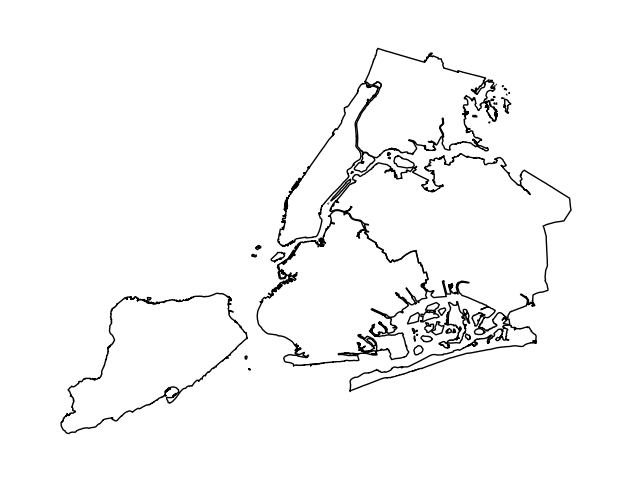

In [ ]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
ax = gplt.polyplot(boroughs)

In [ ]:
collisions_geo = geofuncs.to_geojson(collisions[collisions['NUMBER OF PERSONS INJURED'] > 0], 'NUMBER OF PERSONS INJURED')

NameError: name 'geofuncs' is not defined

In [ ]:
collisions_geo.head()

,geometry,NUMBER OF PERSONS INJURED
0,POINT (40.66720 -73.86650),0.00
1,POINT (40.68330 -73.91727),0.00
2,POINT (40.70918 -73.95682),0.00
3,POINT (40.86816 -73.83148),2.00
4,POINT (40.67172 -73.89710),0.00


In [ ]:
gplt.pointplot(collisions_geo)
gplt.pointplot(
    collisions_geo, 
    ax=ax, 
    hue='NUMBER OF PERSONS INJURED', 
    cmap='Blues',
    scheme='quantiles',
    scale='NUMBER OF PERSONS INJURED')

/Users/daixinming/opt/anaconda3/envs/geoplotEnv/lib/python3.11/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/daixinming/opt/anaconda3/envs/geoplotEnv/lib/python3.11/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x15f495bc0> (for post_execute):


KeyboardInterrupt: 